# Import packages

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from pandas.core.algorithms import value_counts_arraylike
import pydotplus
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
import os
import re
import os
import cv2
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path = "/content/gdrive/MyDrive/AI Capstone/Model2/data/"
replace_missing_data = os.path.join(file_path, "Model 2 (keep missing EXC_TYPE_CODE).csv")
delete_missing_data = os.path.join(file_path + "Model 2 (remove missing EXC_TYPE_CODE).csv")

In [ ]:
data = pd.read_csv(delete_missing_data)
data.head()

,POLICY_NUMBER,POLICY_STATUS_CODE,POLICY_STATUS,EXCL_TYPE_CODE,EXCL_CODE,ENQUIRY_ID,UME_OVERALL_DECISION,Aggregator,sales channel,customer age range,...,IP_AppliedSum,IP_Ext_Replace,IP_Ext_Current,HE_AppliedSum,submission status,Replace Life,Replace TPD,Replace CI,Replace IP,Max Prod
0,2,I,IN FORCE,MEDI,EYB,000145cf-c1c4-48f6-a030-bd014e98ae26,refer,0,Health Connect,Under 30,...,6761,2,0,250000,Submitted,1,2,2,2,IP
1,4,I,IN FORCE,GUAV,-,0012b1a2-901b-4938-b463-94470ddc4cf7,refer,0,Health Connect,40 to 49,...,15058,1,12500,0,Not Submitted,1,1,2,1,IP
2,9,I,IN FORCE,SPIN,SPN,00325f0e-75e9-46d7-bed9-430b8d48c17b,postpone,0,Health Connect,30 to 39,...,3158,1,5312,300000,Not Submitted,1,2,2,1,IP
3,14,I,IN FORCE,MSKL,RFT,00947360-238a-4441-a211-42dd081b22ac,refer,0,Health Connect,50 to 59,...,0,2,0,0,Submitted,2,2,2,2,TPD
4,19,I,IN FORCE,MEDI,MUS,00abea1f-905b-4414-9488-720c23240a00,non-standard,0,Adviser,Under 30,...,7048,1,4772,0,Submitted,1,1,1,1,IP


# Data Preprocessing

In [ ]:
# Check out if an attribute contains null values
print(data.isnull().sum())

POLICY_NUMBER             0
POLICY_STATUS_CODE        0
POLICY_STATUS             0
EXCL_TYPE_CODE            0
EXCL_CODE                 0
ENQUIRY_ID                0
UME_OVERALL_DECISION     30
Aggregator                0
sales channel             0
customer age range        0
gender                    0
smoker                    0
employment status         1
Occ class                 0
collar type               0
Has limits                0
Has Mental                0
Has Back                  0
Products                  0
Has Existing Ins          0
InsH_CurrentTypes       421
LIFE_AppliedSum           0
LIFE_Ext_Replace          0
LIFE_Ext_Current          0
TPD_AppliedSum            0
TPD_Ext_Replace           0
TPD_Ext_Current           0
CI_AppliedSum             0
IP_AppliedSum             0
IP_Ext_Replace            0
IP_Ext_Current            0
HE_AppliedSum             0
submission status         0
Replace Life              0
Replace TPD               0
Replace CI          

In [ ]:
print(data['EXCL_TYPE_CODE'].value_counts())

SPIN    417
MSKL    325
MHEX    320
MEDI    184
PDIC    147
OTHX     87
CNCR     47
PSTM     47
SICK     45
GUAV     36
PAND     31
OIOC     25
SOIP     19
DMEL     17
RESI     16
SOTP     16
BEOC      9
TRAC      9
NWSE      8
BOI6      8
OIO1      7
BOI1      6
MSKE      6
GRAT      4
MEDE      2
DMEA      2
90TR      2
SPNE      2
SUIC      1
PART      1
TRAF      1
PSTD      1
NEWO      1
PTRA      1
BCEX      1
MENT      1
Name: EXCL_TYPE_CODE, dtype: int64


In [ ]:
# Drop all categories less than 10

target_counts = data['EXCL_TYPE_CODE'].value_counts()
data = data[data['EXCL_TYPE_CODE'].isin(target_counts[target_counts > 10].index)]
print(data['EXCL_TYPE_CODE'].value_counts())
print(data['EXCL_TYPE_CODE'].value_counts().count())

SPIN    417
MSKL    325
MHEX    320
MEDI    184
PDIC    147
OTHX     87
PSTM     47
CNCR     47
SICK     45
GUAV     36
PAND     31
OIOC     25
SOIP     19
DMEL     17
SOTP     16
RESI     16
Name: EXCL_TYPE_CODE, dtype: int64
16


In [ ]:
# Convert target attribute into numeric
mapping_dict = {'SPIN': 0, 
                'MSKL': 1, 
                'MHEX': 2, 
                'MEDI': 3, 
                'PDIC': 4, 
                'OTHX': 5, 
                'CNCR': 6, 
                'PSTM': 7, 
                'SICK': 8, 
                'GUAV': 9, 
                'PAND': 10, 
                'OIOC': 11, 
                'SOIP': 12, 
                'DMEL': 13, 
                'RESI': 14, 
                'SOTP': 15 }
after_mapping_target = data['EXCL_TYPE_CODE'].apply(lambda x : mapping_dict[x])
after_mapping_target

0        3
1        9
2        0
3        1
4        3
        ..
1847     1
1848     5
1849     9
1850     2
1851    14
Name: EXCL_TYPE_CODE, Length: 1779, dtype: int64

In [ ]:
# Drop unnecessary columns
columns = ['POLICY_NUMBER', 'POLICY_STATUS', 'ENQUIRY_ID', 'EXCL_CODE', 'InsH_CurrentTypes']

data.drop(columns = columns, axis = 1, inplace = True)
data.head()

,POLICY_STATUS_CODE,EXCL_TYPE_CODE,UME_OVERALL_DECISION,Aggregator,sales channel,customer age range,gender,smoker,employment status,Occ class,...,IP_AppliedSum,IP_Ext_Replace,IP_Ext_Current,HE_AppliedSum,submission status,Replace Life,Replace TPD,Replace CI,Replace IP,Max Prod
0,I,MEDI,refer,0,Health Connect,Under 30,Male,Non-smoker,Permanent employee (full or part time),A3,...,6761,2,0,250000,Submitted,1,2,2,2,IP
1,I,GUAV,refer,0,Health Connect,40 to 49,Male,Non-smoker,Employee (permanent or contractor),A1,...,15058,1,12500,0,Not Submitted,1,1,2,1,IP
2,I,SPIN,postpone,0,Health Connect,30 to 39,Female,Non-smoker,Employee (permanent or contractor),A3,...,3158,1,5312,300000,Not Submitted,1,2,2,1,IP
3,I,MSKL,refer,0,Health Connect,50 to 59,Female,Non-smoker,Permanent employee (full or part time),A3,...,0,2,0,0,Submitted,2,2,2,2,TPD
4,I,MEDI,non-standard,0,Adviser,Under 30,Female,Non-smoker,Permanent employee (full or part time),B3,...,7048,1,4772,0,Submitted,1,1,1,1,IP


In [ ]:
# Fill missing values by using ffill method

data['employment status'].fillna(method = "ffill", inplace = True)
data['UME_OVERALL_DECISION'].fillna(method = "ffill", inplace = True)

In [ ]:
# convert all categorical attributes into numerical variables
categorical_attributes = ['POLICY_STATUS_CODE', 'UME_OVERALL_DECISION', 'sales channel', 
                          'customer age range', 'gender', 'smoker', 'employment status', 
                          'Occ class', 'collar type', 'Products', 'submission status', 'Max Prod']
for column in categorical_attributes:
  data[column] = LabelEncoder().fit_transform(data[column])

In [ ]:
print(data.dtypes)

POLICY_STATUS_CODE       int64
EXCL_TYPE_CODE          object
UME_OVERALL_DECISION     int64
Aggregator               int64
sales channel            int64
customer age range       int64
gender                   int64
smoker                   int64
employment status        int64
Occ class                int64
collar type              int64
Has limits               int64
Has Mental               int64
Has Back                 int64
Products                 int64
Has Existing Ins         int64
LIFE_AppliedSum          int64
LIFE_Ext_Replace         int64
LIFE_Ext_Current         int64
TPD_AppliedSum           int64
TPD_Ext_Replace          int64
TPD_Ext_Current          int64
CI_AppliedSum            int64
IP_AppliedSum            int64
IP_Ext_Replace           int64
IP_Ext_Current           int64
HE_AppliedSum            int64
submission status        int64
Replace Life             int64
Replace TPD              int64
Replace CI               int64
Replace IP               int64
Max Prod

In [ ]:
print(data.head())

   POLICY_STATUS_CODE EXCL_TYPE_CODE  UME_OVERALL_DECISION  Aggregator  \
0                   3           MEDI                     4           0   
1                   3           GUAV                     4           0   
2                   3           SPIN                     3           0   
3                   3           MSKL                     4           0   
4                   3           MEDI                     2           0   

   sales channel  customer age range  gender  smoker  employment status  \
0              2                   4       1       0                  1   
1              2                   1       1       0                  1   
2              2                   0       0       0                  1   
3              2                   2       0       0                  1   
4              0                   4       0       0                  1   

   Occ class  ...  IP_AppliedSum  IP_Ext_Replace  IP_Ext_Current  \
0          4  ...           6761    

In [ ]:
# check that there is no null values in dataset
print(data.isnull().sum())

POLICY_STATUS_CODE      0
EXCL_TYPE_CODE          0
UME_OVERALL_DECISION    0
Aggregator              0
sales channel           0
customer age range      0
gender                  0
smoker                  0
employment status       0
Occ class               0
collar type             0
Has limits              0
Has Mental              0
Has Back                0
Products                0
Has Existing Ins        0
LIFE_AppliedSum         0
LIFE_Ext_Replace        0
LIFE_Ext_Current        0
TPD_AppliedSum          0
TPD_Ext_Replace         0
TPD_Ext_Current         0
CI_AppliedSum           0
IP_AppliedSum           0
IP_Ext_Replace          0
IP_Ext_Current          0
HE_AppliedSum           0
submission status       0
Replace Life            0
Replace TPD             0
Replace CI              0
Replace IP              0
Max Prod                0
dtype: int64


# Split dataset

In [ ]:
# Split dataset (train: 0.8, test: 0.2)
y = after_mapping_target
X = data.drop('EXCL_TYPE_CODE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1423, 32)
(356, 32)
(1423,)
(356,)


# Decision Tree with Gradient Boosting

In [ ]:
# Initial accuracy of gradient boosting model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

print("Training Accuracy:", gb_clf.score(X_train, y_train))
print("Testing Accuracy:", gb_clf.score(X_test, y_test))

Training Accuracy: 0.8517217146872804
Testing Accuracy: 0.42134831460674155


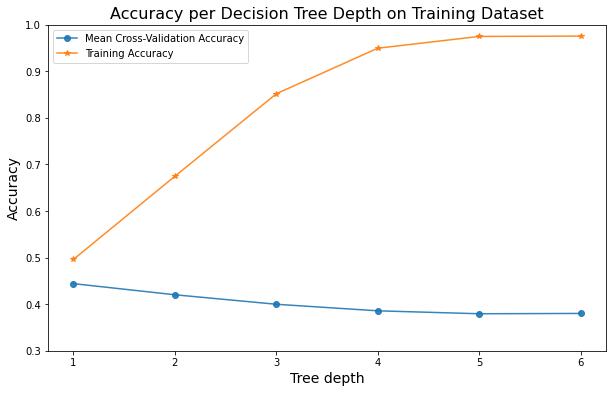

In [ ]:
# Function for fitting trees of various depths on the training data using cross-validation

def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = GradientBoostingClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# Function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(10, 6))
    ax.plot(depths, cv_scores_mean, '-o', label='Mean Cross-Validation Accuracy', alpha=0.9)
    #ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim(0.30, 1.00)
    ax.plot(depths, accuracy_scores, '-*', label='Training Accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# Fitting depth of trees from 1 to 6
sm_tree_depths = range(1, 7)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# Plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per Decision Tree Depth on Training Dataset')

In [ ]:
# Result of cross-validation
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The tree with depth-{} achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The tree with depth-1 achieves the best mean cross-validation accuracy 44.41265 +/- 1.09806% on training dataset


In [ ]:
# Hyperparameter Tuning

grid = {"learning_rate": [0.01, 0.1],
        "max_depth": [2, 3],
        "max_leaf_nodes": [8, 16, 24],
        "n_estimators": [50, 250, 500]
}

grid_cv = GridSearchCV(gb_clf, grid, cv = 4)
grid_cv.fit(X_train, y_train)
print("Best Parameters: ", grid_cv.best_params_)
print("Training Score: ", grid_cv.best_score_)
print("Testing Score: ", grid_cv.score(X_test, y_test))

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 2, 'max_leaf_nodes': 8, 'n_estimators': 250}
Training Score:  0.4455352903940497
Testing Score:  0.4410112359550562


In [ ]:
gb_clf = GradientBoostingClassifier(random_state = 1, learning_rate = 0.01, max_depth = 2, max_leaf_nodes = 8, n_estimators = 250)
gb_clf.fit(X_train, y_train)

print("Training Accuracy:", gb_clf.score(X_train, y_train))
print("Testing Accuracy:", gb_clf.score(X_test, y_test))

Training Accuracy: 0.5108924806746311
Testing Accuracy: 0.4410112359550562


In [ ]:
# Create confusion matrix
gb_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, gb_pred)

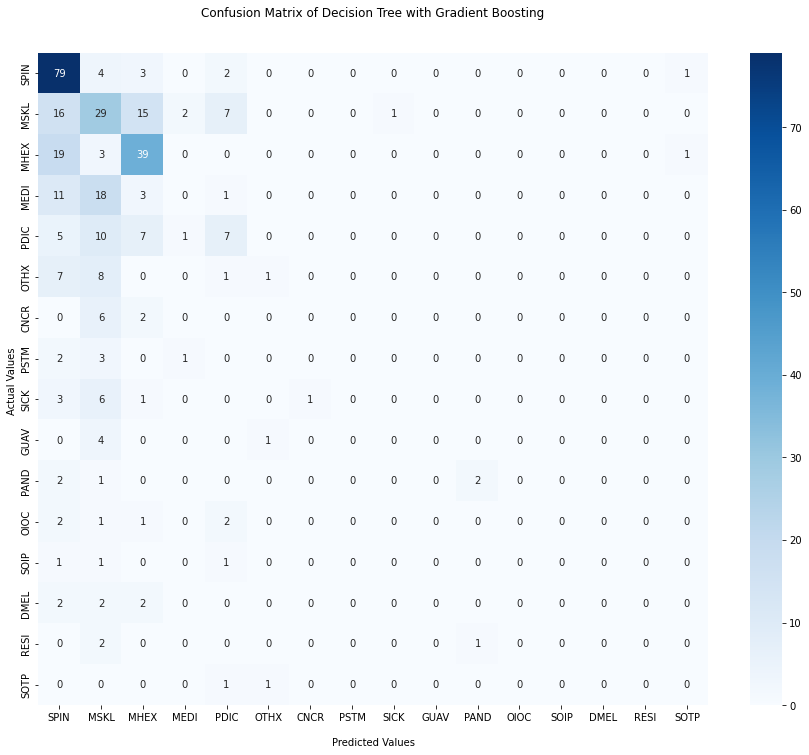

In [ ]:
# Visualize the confusion matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix of Decision Tree with Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['SPIN', 'MSKL', 'MHEX', 'MEDI', 'PDIC', 'OTHX', 'CNCR', 'PSTM', 'SICK', 'GUAV', 
                         'PAND', 'OIOC', 'SOIP', 'DMEL', 'RESI', 'SOTP'])
ax.yaxis.set_ticklabels(['SPIN', 'MSKL', 'MHEX', 'MEDI', 'PDIC', 'OTHX', 'CNCR', 'PSTM', 'SICK', 'GUAV', 
                         'PAND', 'OIOC', 'SOIP', 'DMEL', 'RESI', 'SOTP'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.rcParams['figure.figsize'] = (15, 12)

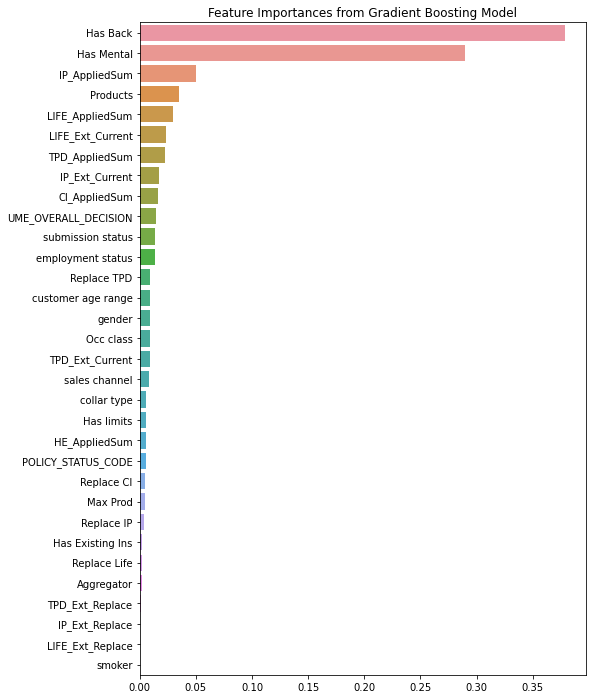

In [ ]:
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_rank = ftr_importances.sort_values(ascending = False)

plt.figure(figsize = (8, 12))
plt.title('Feature Importances from Gradient Boosting Model')
sns.barplot(x = ftr_rank, y = ftr_rank.index)
plt.show()